# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [158]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import statsmodels.api as sm



df=pd.read_csv('data/tennis.csv')
df=df.dropna()

#player 2 scoress
p2p=df['player2 total points won']
#Federer's scores
p1p=df['player1 total points won']

#linear regressions
X=p2p
#adding cst term
X_with_cst=sm.add_constant(p2p)

reg=sm.OLS(p1p, X).fit()
reg_with_cst=sm.OLS(p1p, X_with_cst).fit()

print('Without cst term')
display(reg.summary())
print('With cst term')
display(reg_with_cst.summary())

#the P_value is 0 so it is statisticaly significan and we
#fail reject the null hypothesis

#The coef values means that for every point that the player 2
#scores one point, Federer scores 0.82 points ( + the constant term of 26)
# the constant term is the intercept. 


# we include the constant term because the intercept is not 0, it is not 
#because the player 2 scores 0 points that Federer will also score 0 points


Without cst term


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.173e+04
Date:                      Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                              22:06:10   Log-Likelihood:                         -4262.4
No. Observations:                      1016   AIC:                                      8527.
Df Residuals:                          1015   BIC:                                      8532.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player2 total points won     1.1257      0.006    178.124      0.000       1.113       1.138
==============================================================================
Omnibus:                       71.489   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.456
Skew:                          -0.707   Prob(JB):                     2.78e-19
Kurtosis:                       3.148   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With cst term


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.794
Model:                                  OLS   Adj. R-squared:                  0.794
Method:                       Least Squares   F-statistic:                     3903.
Date:                      Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                              22:06:10   Log-Likelihood:                -4016.0
No. Observations:                      1016   AIC:                             8036.
Df Residuals:                          1014   BIC:                             8046.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       26.3403      1.047     25.160      0.000      24.286      28.395
player2 total points won     0.8200      0.013     62.477      0.000       0.794       0.846
==============================================================================
Omnibus:                       76.898   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.953
Skew:                          -0.634   Prob(JB):                     7.26e-23
Kurtosis:                       3.894   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


In [159]:
from sklearn.preprocessing import PolynomialFeatures

#2.1

df2=pd.read_csv('data/college.csv')


#I'm going to set y = top25perc
y=df2['Top25perc']


X=df2['Top10perc'].to_frame()


polynomial_features_d1= PolynomialFeatures(degree=1)
X_deg1 = polynomial_features_d1.fit_transform(X)

### 
X_deg1_no_cst=np.delete(X_deg1,0,axis=1)

polynomial_features_d2= PolynomialFeatures(degree=2)
X_deg2 = polynomial_features_d2.fit_transform(X)
###
X_deg2_no_cst=np.delete(X_deg2,0,axis=1)


reg=sm.OLS(y, X_deg1).fit()
reg2=sm.OLS(y, X_deg2).fit()

reg_no_cst=sm.OLS(y, X_deg1_no_cst).fit()
reg2_no_cst=sm.OLS(y, X_deg2_no_cst).fit()

print('deg1 with cst')
display(reg.summary())
print('deg2 with cst')
display(reg2.summary())
print('deg1 no cst')
display(reg_no_cst.summary())
print('deg2 no cst')

display(reg2_no_cst.summary())

#the best fit is  one variable and a polynomial of degree 2 with the constant term 
#smaller  AIC and BIC and bigger R squared 



deg1 with cst


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3018.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.87e-269
Time:                        22:06:11   Log-Likelihood:                -2805.2
No. Observations:                 777   AIC:                             5614.
Df Residuals:                     775   BIC:                             5624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1984      0.596     47.281      0.000      27.028      29.369
x1             1.0014      0.018     54.933      0.000       0.966       1.037
==============================================================================
Omnibus:                       45.943   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.462
Skew:                           0.401   Prob(JB):                     2.77e-19
Kurtosis:                       4.413   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

deg2 with cst


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     2220.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.50e-321
Time:                        22:06:11   Log-Likelihood:                -2681.0
No. Observations:                 777   AIC:                             5368.
Df Residuals:                     774   BIC:                             5382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6786      0.845     19.738      0.000      15.020      18.337
x1             1.8140      0.050     36.229      0.000       1.716       1.912
x2            -0.0102      0.001    -17.072      0.000      -0.011      -0.009
==============================================================================
Omnibus:                      177.730   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.823
Skew:                           1.089   Prob(JB):                    1.12e-124
Kurtosis:                       6.590   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

deg1 no cst


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Top25perc   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              7971.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:06:11   Log-Likelihood:                         -3332.4
No. Observations:                 777   AIC:                                      6667.
Df Residuals:                     776   BIC:                                      6671.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7275      0.019     89.281      0.000       1.690       1.766
==============================================================================
Omnibus:                      290.739   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1310.349
Skew:                          -1.681   Prob(JB):                    2.89e-285
Kurtosis:                       8.401   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

deg2 no cst


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Top25perc   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          1.515e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:06:11   Log-Likelihood:                         -2839.4
No. Observations:                 777   AIC:                                      5683.
Df Residuals:                     775   BIC:                                      5692.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7198      0.025    110.830      0.000       2.672       2.768
x2            -0.0195      0.000    -44.515      0.000      -0.020      -0.019
==============================================================================
Omnibus:                      129.648   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.613
Skew:                           0.919   Prob(JB):                     3.51e-63
Kurtosis:                       5.347   Cond. No.                         134.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
#2.2
X_priv=pd.get_dummies(df2[['Private']]).drop('Private_No',axis=1)

X_priv=sm.add_constant(X_priv)

y=df2.Accept

sm.OLS(y, X_priv).fit().summary()


#private schools  see less admissions overall
#because the coef is negative 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Accept   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     226.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           4.95e-45
Time:                        22:06:11   Log-Likelihood:                -7066.5
No. Observations:                 777   AIC:                         1.414e+04
Df Residuals:                     775   BIC:                         1.415e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3919.2877    148.212     26.444      0.000    3628.343    4210.233
Private_Yes -2613.5851    173.808    -15.037      0.000   -2954.776   -2272.394
==============================================================================
Omnibus:                      603.909   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15927.055
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      24.195   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [161]:
#I took the data cleaning from a previous workshop
#Because it was cleaner than mine. 

#Data cleaning 
import io 
df3=pd.read_csv('data/auto.csv')

with open('data/auto.csv','r') as f:
    lines=f.readlines()

data=[lines[0]]+lines[2:]

data=io.StringIO("\n".join([s for s in data]))

auto=pd.read_csv(data, delim_whitespace=True)

auto.horsepower=auto.horsepower.replace('?',np.NAN).astype(float)

auto=auto.dropna()
#end data cleaning 


In [162]:
#i) Is there a relationship between the predictor and the response?
#3.1 R squared is not that high but all the pvalues are low. 
#3.2 # the relationship is not that high since the rsquared is not high 
#3.3 the relationship is negative 

#response variable 
y=auto.mpg
#predictor
x=auto.horsepower

deg=2

x = x[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=deg)

x = polynomial_features.fit_transform(x)

#I tested without a cst term ant AIC&BIC where higher
#x=np.delete(x,0,axis=1)




reg=sm.OLS(y, x).fit()
display(reg.summary())
xmax=x[:,1].max()
xmin=x[:,1].min()
x_fit=np.linspace(xmin,xmax,100)[:, np.newaxis]
x_fit = polynomial_features.fit_transform(x_fit)
y_fit = reg.predict(x_fit[:, np.newaxis])






<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           5.40e-99
Time:                        22:06:11   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.000      53.360      60.440
x1            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
x2             0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

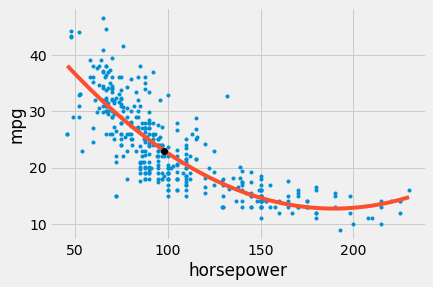

In [163]:
if deg==2:
    y1 = reg.predict(np.array([1,98,98**2]))
if deg==1:
    y1 = reg.predict(np.array([1,98]))

#3.5
plt.style.use('fivethirtyeight')
fig, ax=plt.subplots()
ax.plot(x[:,1],y,'.')
ax.plot(x_fit[:,1],y_fit)
ax.set_ylabel('mpg')
ax.set_xlabel('horsepower')
ax.plot(98,y1,'ok')


In [164]:
#3.4
print(F'predicted mpg associated with a horsepower of 98: {y1[0]:.2f}')
display(reg.conf_int(alpha=0.05, cols=None))

predicted mpg associated with a horsepower of 98: 23.03


,0,1
const,53.360315,60.439885
x1,-0.527383,-0.404996
x2,0.000991,0.001471


# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [165]:
#4.1

auto=auto.dropna()

df4=auto.drop(['mpg','name'],axis=1)

y=auto.mpg

X4=sm.add_constant(df4)

reg=sm.OLS(y, X4).fit()
display(reg.summary())


#R-squared is high and p values are low, so there is 
#relationship between the predictors and the response

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.04e-139
Time:                        22:06:12   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
#4.2

#statistically insignificant relationship
#P_Values > 5%

#cylinders
#horsepower
#acceleration
df4_2=df4.drop(['cylinders','horsepower','acceleration'],axis=1)



In [167]:
#4.3
X4=sm.add_constant(df4_2)

reg=sm.OLS(y, X4).fit()
display(reg.summary())

# for every one year, the mpg increase by 0.7714 +/- 0.050

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     435.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          9.57e-142
Time:                        22:06:12   Log-Likelihood:                -1027.2
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     387   BIC:                             2084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.6065      4.028     -4.620      0.000     -26.526     -10.687
displacement     0.0056      0.005      1.172      0.242      -0.004       0.015
weight          -0.0066      0.001    -11.802      0.000      -0.008      -0.005
year             0.7714      0.050     15.486      0.000       0.673       0.869
origin           1.2262      0.267      4.593      0.000       0.701       1.751
==============================================================================
Omnibus:                       37.960   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.311
Skew:                           0.562   Prob(JB):                     1.20e-16
Kurtosis:                       4.796   Cond. No.                     7.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

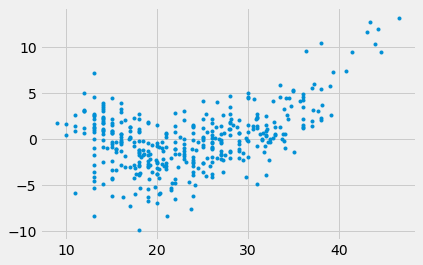

In [168]:
 #4.4
 pred_val = reg.fittedvalues
 residual = y - pred_val
 plt.plot(y,residual,'.')

 # it has a U shape and no randomly distributed, so the fit is not good 


In [169]:
#4.5
#Is there heteroscedasticity in the fit?

est2 = sm.OLS(y, X4).fit(cov_type='HC2')
est2.summary()

# the std err does not change by alot, so  there is no heteroscedasticity

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     411.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          6.59e-138
Time:                        22:06:12   Log-Likelihood:                -1027.2
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     387   BIC:                             2084.
Df Model:                           4                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.6065      3.823     -4.866      0.000     -26.100     -11.113
displacement     0.0056      0.005      1.070      0.285      -0.005       0.016
weight          -0.0066      0.001    -10.648      0.000      -0.008      -0.005
year             0.7714      0.050     15.296      0.000       0.673       0.870
origin           1.2262      0.270      4.537      0.000       0.696       1.756
==============================================================================
Omnibus:                       37.960   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.311
Skew:                           0.562   Prob(JB):                     1.20e-16
Kurtosis:                       4.796   Cond. No.                     7.40e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 7.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [170]:
#5.1 Fit a multiple regression model to predict Sales using Price, Urban, and US.

df5=pd.read_csv('data/carseats.csv')
df5=df5.dropna()
y=df5['Sales']
X=df5[['Price','Urban','US']]

X['Urban'].loc[X['Urban']=='Yes']=1
X['US'].loc[X['US']=='Yes']=1
X['Urban'].loc[X['Urban']=='No']=0
X['US'].loc[X['US']=='No']=0

X=sm.add_constant(X)
reg=sm.OLS(y, X).fit()
reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.39e-23
Time:                        22:06:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#5.2

Price: When the price goes up by 1$ the number of carseat decrease by 0.0545 
so if the price goes up by 100, the number of carseat sold decrease by 5.45



Urban: not affected since the p_value is high (0.936) so there is no interpretation





#5.3 For which of the predictors can you reject the null hypothesis H0 : βj = 0?


Urban because of the high value of the P_value (0.936)




In [171]:
#5.4
X2=X.drop('Urban',axis=1)
reg2=sm.OLS(y, X2).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.66e-24
Time:                        22:06:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
#5.5
print('old reg')
display(reg.summary())

print('new reg')
display(reg2.summary())


# observation no.1
#BIC and AIC is slighly smaller

#observation no.2
#The standart error is smaller for US and the constant 

#The p_value did not change. 

old reg


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.39e-23
Time:                        22:06:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

new reg


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.66e-24
Time:                        22:06:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
#5.6
err=reg2.conf_int(alpha=0.05)
err.columns=['2.5%','97.5%']

display(err)

,2.5%,97.5%
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766
